# House Prices - Advanced Regression Techniques

In [1]:
# Predict sales prices and practice feature engineering
#https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import KFold, cross_val_score

In [3]:
#load data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
df = pd.concat([train_df, test_df], axis=0).reset_index().drop(columns=['index'])
len_train = len(train_df)

 ## EDA

In [4]:
df.loc[[2549,2592]][['YrSold','GarageYrBlt']]

,YrSold,GarageYrBlt
2549,2007,2008.0
2592,2007,2207.0


In [5]:
df.at[2549, 'GarageYrBlt'] = 2007
df.at[2592, 'GarageYrBlt'] = 2007

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [7]:
df.shape

(2919, 81)

In [8]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

### Missing Data

In [10]:
missing_data = pd.DataFrame(df.isna().sum(axis=0)/len(df), columns = ['na_percentage'])
missing_data = missing_data[missing_data['na_percentage'] != 0].sort_values(by='na_percentage').reset_index().rename(columns = {'index': 'col'})
missing_data = missing_data.merge(pd.DataFrame(df.dtypes).reset_index().rename(columns = {'index': 'col', 0:'dtype'}), on = 'col')


In [11]:
missing_data

,col,na_percentage,dtype
0,Electrical,0.000343,object
1,GarageArea,0.000343,float64
2,GarageCars,0.000343,float64
3,Exterior1st,0.000343,object
4,Exterior2nd,0.000343,object
5,KitchenQual,0.000343,object
6,SaleType,0.000343,object
7,TotalBsmtSF,0.000343,float64
8,BsmtFinSF1,0.000343,float64
9,BsmtUnfSF,0.000343,float64


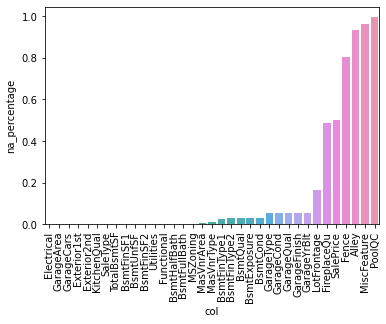

In [12]:
f, ax = plt.subplots()
ax = sns.barplot(x=missing_data.col, y=missing_data.na_percentage)
ax.tick_params(axis='x', labelrotation = 90)

#### Fill in missing data

In [13]:
df['Electrical'] = df['Electrical'].fillna('SBrkr')
df['GarageArea'] = df['GarageArea'].fillna(0)
df['GarageCars'] = df['GarageCars'].fillna(0)
df['Exterior1st'] = df['Exterior1st'].fillna(train_df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(train_df['Exterior2nd'].mode()[0])
df['KitchenQual'] = df['KitchenQual'].fillna('TA')
df['SaleType'] = df['SaleType'].fillna(train_df['SaleType'].mode()[0])
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(0)
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(0)
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(0)
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(0)
df['Utilities'] = df['Utilities'].fillna(train_df['Utilities'].mode()[0])
df['Functional'] = df['Functional'].fillna(train_df['Functional'].mode()[0])
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0)
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0)
df['MSZoning'] = df['MSZoning'].fillna(train_df['MSZoning'].mode()[0])
df['MasVnrType'] = df['MasVnrType'].fillna('NA')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['BsmtQual'] = df['BsmtQual'].fillna('NA')
df['BsmtCond'] = df['BsmtCond'].fillna('NA')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('NA')
df['BsmtExposure'] = df['BsmtExposure'].fillna('NA')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('NA')
df['GarageCond'] = df['GarageCond'].fillna('NA')
df['GarageQual'] = df['GarageQual'].fillna('NA')
df['GarageFinish'] = df['GarageFinish'].fillna('NA')
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['GarageType'] = df['GarageType'].fillna('NA')
df['LotFrontage'] = df['LotFrontage'].fillna(0)
df['FireplaceQu'] = df['FireplaceQu'].fillna('NA')
df['Fence'] = df['Fence'].fillna('NA')
df['Alley'] = df['Alley'].fillna('NA')
df['MiscFeature'] = df['MiscFeature'].fillna('NA')
df['PoolQC'] = df['PoolQC'].fillna('NA')

In [14]:
df.groupby('Electrical')['Id'].count()

Electrical
FuseA     188
FuseF      50
FuseP       8
Mix         1
SBrkr    2672
Name: Id, dtype: int64

In [15]:
missing_data = pd.DataFrame(df.isna().sum(axis=0))
missing_data[missing_data[0] > 0]

,0
SalePrice,1459


In [16]:
Id = df['Id']
y = df['SalePrice']
X = df.drop(labels=['SalePrice', 'Id'], axis=1)

### Categorical Columns

In [17]:
## convert MoSold, YrSold and MSSubClass to categorical variables
X['MoSold'] = X['MoSold'].apply(str)
X['YrSold'] = X['YrSold'].apply(str)

X['MSSubClass'] = X['MSSubClass'].apply(str)

In [18]:
X.select_dtypes(include=['object'])

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,NA,NA,NA,2,2008,WD,Normal
1,20,RL,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,TA,TA,Y,NA,NA,NA,5,2007,WD,Normal
2,60,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,NA,NA,NA,9,2008,WD,Normal
3,70,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,TA,TA,Y,NA,NA,NA,2,2006,WD,Abnorml
4,60,RL,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,TA,TA,Y,NA,NA,NA,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,NA,NA,Y,NA,NA,NA,6,2006,WD,Normal
2915,160,RM,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,TA,TA,Y,NA,NA,NA,4,2006,WD,Abnorml
2916,20,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,TA,TA,Y,NA,NA,NA,9,2006,WD,Abnorml
2917,85,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,NA,NA,Y,NA,MnPrv,Shed,7,2006,WD,Normal


### Numerical columns

In [19]:
## transform YearBuilt and YearRemodAdd to age
X['AgeSinceBuilt'] = X['YrSold'].apply(int) - X['YearBuilt']
X['AgeSinceRemodAdd'] = X['YrSold'].apply(int) - X['YearRemodAdd']
X['GarageAge'] = X['YrSold'].apply(int) - X['GarageYrBlt']

X.drop(labels = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt'], inplace=True, axis=1)

In [20]:
numerical_cols = X.select_dtypes(exclude=['object'])
numerical_cols

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,AgeSinceBuilt,AgeSinceRemodAdd,GarageAge
0,65.0,8450,7,5,196.0,706.0,0.0,150.0,856.0,856,...,0,61,0,0,0,0,0,5,5,5.0
1,80.0,9600,6,8,0.0,978.0,0.0,284.0,1262.0,1262,...,298,0,0,0,0,0,0,31,31,31.0
2,68.0,11250,7,5,162.0,486.0,0.0,434.0,920.0,920,...,0,42,0,0,0,0,0,7,6,7.0
3,60.0,9550,7,5,0.0,216.0,0.0,540.0,756.0,961,...,0,35,272,0,0,0,0,91,36,8.0
4,84.0,14260,8,5,350.0,655.0,0.0,490.0,1145.0,1145,...,192,84,0,0,0,0,0,8,8,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,21.0,1936,4,7,0.0,0.0,0.0,546.0,546.0,546,...,0,0,0,0,0,0,0,36,36,2006.0
2915,21.0,1894,4,5,0.0,252.0,0.0,294.0,546.0,546,...,0,24,0,0,0,0,0,36,36,36.0
2916,160.0,20000,5,7,0.0,1224.0,0.0,0.0,1224.0,1224,...,474,0,0,0,0,0,0,46,10,46.0
2917,62.0,10441,5,5,0.0,337.0,0.0,575.0,912.0,970,...,80,32,0,0,0,0,700,14,14,2006.0


#### Log transform skewed features and target

In [21]:
skewed_features = []
for idx, val in numerical_cols.skew().items():
    if abs(val) > 1:
        skewed_features.append(idx)
        X[idx] = np.log1p(X[idx])
    
y = np.log1p(y)

In [22]:
# skewed features
skewed_features

['LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 '1stFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'GarageAge']

### one-hot encoding of feature variables

In [23]:
X = pd.get_dummies(X)

In [24]:
train_X = X[:len_train]
train_y = y[:len_train]
test_X = X[len_train:]

## Models

In [25]:
seed = 23
# 5-fold CV
folds = KFold(n_splits=5, random_state=seed, shuffle=True)

#### Ridge Regression

In [26]:
ridge = Ridge(random_state=seed)
ridge_cv = GridSearchCV(ridge, {'alpha': np.logspace(0,2,20)}, scoring='neg_mean_squared_error')
ridge_cv.fit(train_X, train_y)
best_ridge = ridge_cv.best_estimator_
best_ridge

Ridge(alpha=14.38449888287663, random_state=23)

In [40]:
ridge_cv.cv_results_

{'mean_fit_time': array([0.03257589, 0.02133236, 0.02309208, 0.01327419, 0.01477237,
        0.01623359, 0.0190618 , 0.01708479, 0.01471958, 0.01224532,
        0.01075811, 0.01162882, 0.01253099, 0.01028538, 0.01074657,
        0.01182437, 0.01422954, 0.01242313, 0.01348557, 0.01250081]),
 'std_fit_time': array([0.02997275, 0.00677361, 0.00775733, 0.00093491, 0.00124045,
        0.00147957, 0.00455402, 0.00524361, 0.00221554, 0.00072167,
        0.00068329, 0.00105877, 0.00170193, 0.00039822, 0.00062293,
        0.00129272, 0.00206374, 0.00112933, 0.00164826, 0.00020504]),
 'mean_score_time': array([0.00694785, 0.00733991, 0.00448551, 0.00390244, 0.00443101,
        0.00569916, 0.00482602, 0.00470619, 0.00397925, 0.00392194,
        0.0031415 , 0.00346465, 0.00380945, 0.00291047, 0.00330749,
        0.00374293, 0.00456448, 0.00322604, 0.00357723, 0.00321054]),
 'std_score_time': array([4.04990686e-03, 2.43583404e-03, 8.91873327e-04, 1.99822079e-03,
        7.44526002e-04, 1.78254359e-

In [27]:
best_ridge.fit(train_X, train_y)
ridge_pred_y = best_ridge.predict(train_X)
np.mean((train_y - ridge_pred_y) ** 2)

0.01113783270696204

In [37]:
best_ridge.coef_

array([-2.61875063e-04,  7.51570376e-02,  5.27223892e-02,  3.79391399e-02,
       -4.75663017e-04,  1.54381395e-02,  1.48377280e-03,  1.49517888e-05,
        3.34385115e-02,  1.37920695e-01,  1.44690662e-04,  3.11530749e-03,
        1.39005377e-01,  2.71588896e-02,  3.46272857e-03,  3.45127594e-02,
        2.65109677e-02, -1.15874551e-03, -2.53466765e-02,  8.99053821e-03,
        9.68697894e-03,  4.71166192e-02,  2.01830011e-05,  3.99078331e-03,
        2.76224951e-03,  4.53084078e-03,  6.30985840e-03,  9.93051021e-03,
       -4.73724463e-03, -4.83557505e-03, -1.59437614e-03, -7.42364177e-04,
        1.91249972e-03,  4.56158257e-03,  0.00000000e+00, -2.69465524e-02,
        2.20765422e-03, -1.46708287e-03,  2.04251264e-02, -3.09264487e-02,
       -1.04340127e-03,  3.80022588e-03,  1.07082793e-02, -2.63305015e-02,
        3.05602825e-02,  9.24205433e-03,  3.75450762e-03,  2.37634188e-03,
       -9.22067893e-04, -1.17620757e-01,  4.68698930e-02,  2.74333280e-02,
        3.98853048e-02,  

#### LASSO Regression

In [38]:
lasso = Lasso(random_state=seed)
lasso_cv = GridSearchCV(lasso, {'alpha': np.logspace(0,2,20)}, scoring='neg_mean_squared_error')
lasso_cv.fit(train_X, train_y)
best_lasso = lasso_cv.best_estimator_
best_lasso

Lasso(random_state=23)

In [39]:
best_lasso.fit(train_X, train_y)
lasso_pred_y = best_lasso.predict(train_X)
np.mean((train_y - lasso_pred_y) ** 2)

0.06263396301292196

In [36]:
best_lasso.coef_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  7.36440562e-05,
        0.00000000e+00,  0.00000000e+00,  2.13564311e-04,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  8.44158607e-04,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -2.78150597e-03, -2.02760718e-03,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -

## Predict

In [30]:
test_pred = best_ridge.predict(test_X)

In [31]:
submission = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': np.expm1(test_pred)})

In [32]:
submission.to_csv('submission.csv', index=False)